In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image
# Pillow library
from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm.notebook import tqdm

####Importing Data

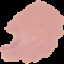

In [7]:
from keras.preprocessing.image import ImageDataGenerator,load_img
/content/drive/MyDrive/Malaria/cell_images/Uninfected
load_img('/content/drive/MyDrive/Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png',target_size=(64,64))

In [8]:
os.environ['KERAS_BACKEND']='tensorflow'

In [9]:
np.random.seed(312)

In [16]:
image_dir = "/content/drive/MyDrive/Malaria/cell_images/"
size = 64
dataset = []
label = []

In [34]:
parasitized_img = os.listdir(image_dir+"Parasitized/")
parasitized_img = parasitized_img[:2000]
for img_name in tqdm(parasitized_img):
  if (img_name.split('.')[1] == 'png'):
    image = cv2.imread(image_dir+"Parasitized/"+img_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size))

    dataset.append(np.array(image))
    label.append(0)


  0%|          | 0/2000 [00:00<?, ?it/s]

In [35]:
len(parasitized_img)

2000

In [37]:
(uninfected_img )=os.listdir(image_dir+"Uninfected")
uninfected_img = uninfected_img[:2000]
for img_name in tqdm(uninfected_img):
  if (img_name.split('.')[1] == 'png'):
    image = cv2.imread(image_dir+"Uninfected/"+img_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size))

    dataset.append(np.array(image))
    label.append(1)


  0%|          | 0/2000 [00:00<?, ?it/s]

In [38]:
len(uninfected_img )

2000

In [40]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size =.2,random_state =0)

####CNN Model Archietecture

In [41]:
input_shape = (size,size,3)
input  = k.Input(shape = input_shape)
conv1 = k.Conv2D(32,kernel_size=(3,3),activation ="relu",padding = "same")(input)
pool1 = k.MaxPool2D(pool_size =(2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)

drop1 = k.Dropout(rate =.2)(norm1)

conv2 = k.Conv2D(32,kernel_size=(3,3),activation ="relu",padding = "same")(input)
pool2 = k.MaxPool2D(pool_size =(2,2))(conv1)
norm2 = k.BatchNormalization(axis = -1)(pool1)

drop2 = k.Dropout(rate =.2)(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3 = k.BatchNormalization(axis =-1)(hidden1)
drop3 = k.Dropout(rate = .2)(norm3)

hidden2 = k.Dense(256,activation ="relu")(drop3)
norm4 = k.BatchNormalization(axis =-1)(hidden2)
drop4 = k.Dropout(rate =.2)(norm4)

out = k.Dense(2,activation="sigmoid")(drop4)


In [46]:
model = keras.Model(inputs = input ,outputs = out)
model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0   

In [47]:
history = model.fit(np.array(xtrain),ytrain,batch_size=64,verbose = 1,epochs = 5,validation_split=.1)

Epoch 1/5
122/122 [==============================] - 79s 628ms/step - loss: 0.6429 - accuracy: 0.6985 - val_loss: 2.4941 - val_accuracy: 0.4683
Epoch 2/5
122/122 [==============================] - 74s 608ms/step - loss: 0.4470 - accuracy: 0.7802 - val_loss: 0.8331 - val_accuracy: 0.7970
Epoch 3/5
122/122 [==============================] - 74s 606ms/step - loss: 0.4276 - accuracy: 0.7903 - val_loss: 0.4641 - val_accuracy: 0.8005
Epoch 4/5
122/122 [==============================] - 76s 621ms/step - loss: 0.4046 - accuracy: 0.7976 - val_loss: 0.4815 - val_accuracy: 0.7924
Epoch 5/5
122/122 [==============================] - 74s 606ms/step - loss: 0.3884 - accuracy: 0.8032 - val_loss: 0.4499 - val_accuracy: 0.7751


In [53]:
print("TEST_Accracy: {:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))


68/68 [==============================] - 4s 54ms/step - loss: 0.4298 - accuracy: 0.7831
TEST_Accracy: 78.31%


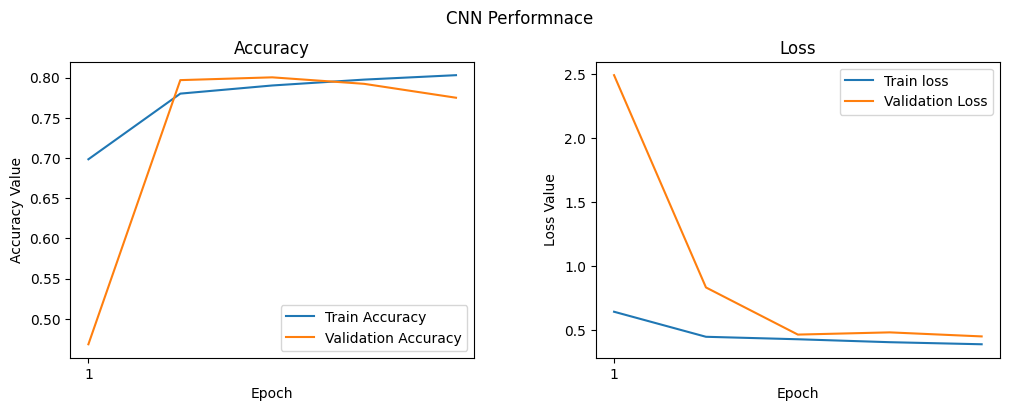

In [55]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
t = f.suptitle('CNN Performnace', fontsize =12)
f.subplots_adjust(top = 0.85,wspace =0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label ='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label ='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list,history.history['loss'],label ='Train loss')
ax2.plot(epoch_list,history.history['val_loss'],label ='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2= ax2.legend(loc="best")

